# Goodreads reviews EDA

In this notebook we will analyse the dataset "Goodreads Book Datasets With User Rating 2M" published on Kaggle (https://www.kaggle.com/datasets/bahramjannesarr/goodreads-book-datasets-10m).

# Main findings

- TODO

In [1]:
import pandas as pd
import seaborn as sns
import glob
import tqdm
sns.set(rc={'figure.figsize':(11.7,8.27)})

## 1) Load data and Overview

- Not all files from the dataset contain the column "Description". We are loading only the files that include that column.

In [2]:
block_list = ['../data/book1-100k.csv',
              '../data/book100-200k.csv',
              '../data/book200-300k.csv',
              '../data/book300-400k.csv',
              '../data/book400-500k.csv',
              '../data/book500-600k.csv',
              ]
file_names = glob.glob('../data/book*.csv')

dfs = []

for file_name in tqdm.tqdm(file_names):
   if file_name not in block_list:
       df = pd.read_csv(file_name)
       if 'pagesNumber' in df.columns:
           df.rename(columns = {'pagesNumber' : 'PagesNumber'}, inplace=True)
       dfs.append(df)

df = pd.concat(dfs)
del dfs

100%|██████████| 23/23 [00:09<00:00,  2.34it/s]


In [3]:
df.index.size

1792018

In [4]:
df.dtypes

Id                         int64
Name                      object
Authors                   object
ISBN                      object
Rating                   float64
PublishYear                int64
PublishMonth               int64
PublishDay                 int64
Publisher                 object
RatingDist5               object
RatingDist4               object
RatingDist3               object
RatingDist2               object
RatingDist1               object
RatingDistTotal           object
CountsOfReview             int64
Language                  object
PagesNumber                int64
Description               object
Count of text reviews    float64
dtype: object

In [5]:
df.describe()

,Id,Rating,PublishYear,PublishMonth,PublishDay,CountsOfReview,PagesNumber,Count of text reviews
count,1.792018e+06,1.792018e+06,1.792018e+06,1.792018e+06,1.792018e+06,1.792018e+06,1.792018e+06,409697.000000
mean,2.178663e+06,2.869331e+00,1.997786e+03,7.619405e+00,8.038701e+00,7.149217e+00,2.759867e+02,7.172742
std,1.380094e+06,1.737683e+00,8.928656e+01,7.645796e+00,8.538634e+00,1.968291e+02,5.086590e+03,124.838833
min,1.000000e+05,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,9.204588e+05,0.000000e+00,1.993000e+03,1.000000e+00,1.000000e+00,0.000000e+00,1.440000e+02,0.000000
50%,2.081502e+06,3.670000e+00,2.000000e+03,6.000000e+00,5.000000e+00,0.000000e+00,2.380000e+02,1.000000
75%,3.242957e+06,4.000000e+00,2.005000e+03,1.100000e+01,1.100000e+01,1.000000e+00,3.360000e+02,3.000000
max,4.846451e+06,5.000000e+00,6.553500e+04,3.100000e+01,3.100000e+01,1.544470e+05,4.517845e+06,43652.000000


In [6]:
df.head()

,Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,RatingDist4,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,PagesNumber,Description,Count of text reviews
0,1900511,Barbarossa,Christopher Ailsby,1840138009,3.0,2007,4,1,New Line Books,5:0,4:0,3:1,2:0,1:0,total:1,0,NaN,192,"On 22 June 1941, Adolf Hitler launched Operati...",NaN
1,1900512,Collector's Guide to German World War II: Comb...,Christopher Ailsby,0781802253,0.0,1994,7,1,Hippocrene Books,5:0,4:0,3:0,2:0,1:0,total:0,0,NaN,160,NaN,NaN
2,1900514,Images of Barbarossa,Christopher Ailsby,0711028257,3.5,2001,1,25,Ian Allan Ltd,5:0,4:5,3:2,2:1,1:0,total:8,0,NaN,256,"On 22 June 1941, Adolf Hitler launched Operati...",NaN
3,1900520,Romania After 2000: Five New Romanian Plays,Daniel Charles Gerould,0595436560,4.0,2007,9,1,Martin E. Segal Theatre Center Publications,5:1,4:4,3:1,2:0,1:0,total:6,0,NaN,226,The first anthology of new Romanian Drama publ...,NaN
4,1900521,Global Foreigners: An Anthology of Plays,Saviana Stănescu,1905422423,4.6,2006,12,7,Seagull Books,5:4,4:0,3:1,2:0,1:0,total:5,0,NaN,320,"In Waxing West, Daniella, newly arrived in the...",NaN


## 2) Check for Duplications

- There are no fully duplicated rows

In [7]:
df.duplicated().sum()

0

## 3) Lowercase Name, Description and Publisher

In [8]:
df['Name'] = df.Name.str.lower()
df['Description'] = df.Description.str.lower()
df['Publisher'] = df.Publisher.str.lower()

## 4) Check & Address NaN

In [9]:
df.isna().sum()

Id                             0
Name                           0
Authors                        0
ISBN                        5377
Rating                         0
PublishYear                    0
PublishMonth                   0
PublishDay                     0
Publisher                  17332
RatingDist5                    0
RatingDist4                    0
RatingDist3                    0
RatingDist2                    0
RatingDist1                    0
RatingDistTotal                0
CountsOfReview                 0
Language                 1560490
PagesNumber                    0
Description               620830
Count of text reviews    1382321
dtype: int64

### Descriptions
- Check if books without description are duplicated in the dataset (Name)

In [10]:
print(f'{round(df.Description.isna().sum()*100/df.size, 2)}% of the books in the dataset lack a description')

1.73% of the books in the dataset lack a description


In [11]:
books_unique_names_na_description = df[df['Description'].isna()].Name.unique()
books_with_description = df[~df.Description.isna()]
books_with_description_which_appear_also_without_description = books_with_description[books_with_description.Name.isin(books_unique_names_na_description)].Name.unique()


print(f'{round(books_with_description_which_appear_also_without_description.size *100 /  books_unique_names_na_description.size, 2)} % of the books with NaN descriptions have a repetition with description')

11.85 % of the books with NaN descriptions have a repetition with description


- We are dropping books without description from the dataset.

In [12]:
df.dropna(subset= 'Description', inplace=True)

### Publisher:

- If publisher is NaN, it's usually classics or religious books (e.g. the Bible, or Plato's Republic)

In [13]:
df[df['Publisher'].isna()]['Name'].head(10)

382                                     le roman colonial
524     memorial volumes to jewish communities destroy...
585                                      without feathers
590     guidelines for drinking-water quality. first a...
765                          building geographic literacy
812                               mundo del fin del mundo
1006               america's history through young voices
1220                               liber contra wolfelmum
2045          azumanga daioh, band 1 (azumanga daioh, #1)
2048          azumanga daioh, band 4 (azumanga daioh, #4)
Name: Name, dtype: object

- We have decided to encode NaN Publisher values as "Unknown"

In [14]:
print(df['Publisher'].isna().sum().astype(str) + ' NaN values replaced by "Unknown"')
df['Publisher'] = df['Publisher'].fillna("Unknown")

7862 NaN values replaced by "Unknown"


### Language:



- The majority of the titles of the dataset are in English.

In [15]:
df['Language'].value_counts().head(10)

eng      105450
en-US     11527
fre       10924
ger        7753
en-GB      5132
spa        4444
jpn        1404
ita         851
nl          302
por         254
Name: Language, dtype: int64

- We have applied a heuristic tool with the most popular English stopwords to check if the Name (Title) of books with NaN values for Language contained them. The vast majority did.

In [16]:
import spacy
from spacy.lang.en import STOP_WORDS
import re
regex = re.compile('\w+')



eng_stop_words = spacy.lang.en.STOP_WORDS
nan_language_books = df[df['Language'].isna()]

def contains_eng_stopword(text):
    words_in_text = regex.findall(text)
    return any(word in words_in_text for word in eng_stop_words)

eng_counter = nan_language_books.Name.apply(contains_eng_stopword).sum()

print(f' {round(eng_counter*100/len(nan_language_books), 2)} % of books with NaN values for Language contained English stopwords.')

 79.73 % of books with NaN values for Language contained English stopwords.


- With the two considerations above, we have decided to encode NaNs to english

In [17]:
print(df['Language'].isna().sum().astype(str) + ' NaN values replaced by "eng"')
df['Language'] = df['Language'].fillna('eng')

1021168 NaN values replaced by "eng"


- After checking unique values for "Language", we have also decided to encode all variations of English as "eng"

In [18]:
df['Language'].unique()

array(['eng', 'en-US', 'en-GB', 'fre', 'spa', 'swe', 'ger', 'ita', 'sco',
       'jpn', 'nl', 'por', 'zho', 'kor', 'ind', 'lat', 'gmh', 'msa',
       'mul', 'eus', 'nor', 'per', 'wel', 'enm', 'rus', 'pol', 'grc',
       'rum', 'ave', 'epo', 'dan', 'mga', 'gre', 'tur', 'fin', 'gle',
       'en-CA', 'gla', 'srp', 'tha', 'urd', 'glg', 'frs', 'wak', 'ara',
       'heb', 'hun', 'guj', 'raj', 'hin', 'cat', 'ang', 'afr', 'ypk',
       'frm', 'tlh', 'tah', 'slv', 'nav', 'tli', 'san', 'cop', 'tel',
       'gem', 'haw', 'sam', 'bul', '--', 'fan', 'est', 'cze', 'yid',
       'scr', 'nld', 'tgl', 'hye', 'sqi', 'ben', 'mal', 'zap', 'elx',
       'nob', 'nai', 'lit', 'fro', 'hmn', 'cre', 'nqo', 'som', 'vie',
       'goh', 'jav', 'mri', 'sna', 'aze', 'myv', 'ira', 'ssw', 'mis',
       'aus', 'mah'], dtype=object)

In [19]:
language_mask = df['Language'].str.startswith('en-')
english_varieties = df.loc[language_mask, 'Language']
print(english_varieties.count().astype(str) + ' values standardised as "eng"')
english_varieties = 'eng'

16711 values standardised as "eng"


- To simplify the scope of this project, we will drop all entries that are not in English

In [20]:
print(df['Language'][df.Language != 'eng'].count().astype(str) + ' non-English books removed')
df = df.drop(df[df.Language != 'eng'].index)

44570 non-English books removed


### ISBN

- This column is not relevant for the analysis, so we have decided to drop it.

In [21]:
df = df.drop(columns='ISBN')

## 5) Check dates and replace by datetime format

### Months & Days
- Month and date are noisy variables and have format problems, so we will drop both columns.

In [22]:
df = df.drop(columns=['PublishMonth', 'PublishDay'])

### Year

- Remove all rows with year before the minimum of timestamp (1677)

In [23]:
print(f"Books before {pd.Timestamp.min.year} dropped: {(df['PublishYear'] <= pd.Timestamp.min.year).sum()}")

Books before 1677 dropped: 3


In [24]:
df = df.drop(df[df['PublishYear'] <= pd.Timestamp.min.year].index)

- Remove all rows with year after the current (probably wrong data)

In [25]:
from datetime import date
print(f"Books after {date.today().year} dropped: {(df['PublishYear'] >= date.today().year).sum()}")

Books after 2022 dropped: 11


In [26]:
df = df.drop(df[df['PublishYear'] >= date.today().year].index)

- The number of published books tends to increase every year. However, there's a strange drop after the 2010s.

In [27]:
df.PublishYear

0        2007
3        2007
4        2006
5        2003
12       2007
         ... 
34751    2003
34752    1996
34754    1989
34755    1998
34758    2000
Name: PublishYear, Length: 870925, dtype: int64

In [28]:
df.reset_index(drop=True, inplace=True)

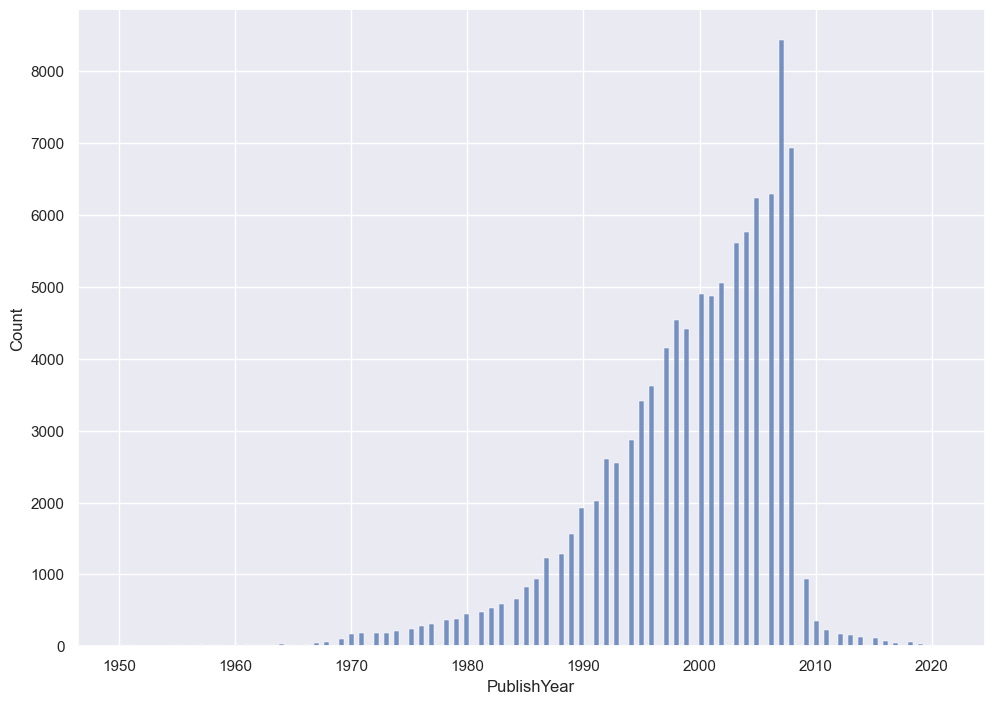

In [29]:
g = sns.histplot(data=df[df['PublishYear'] >= 1950].sample(100000),
                 x='PublishYear')
# g.set(ylim=(0, 500000))

<AxesSubplot: >

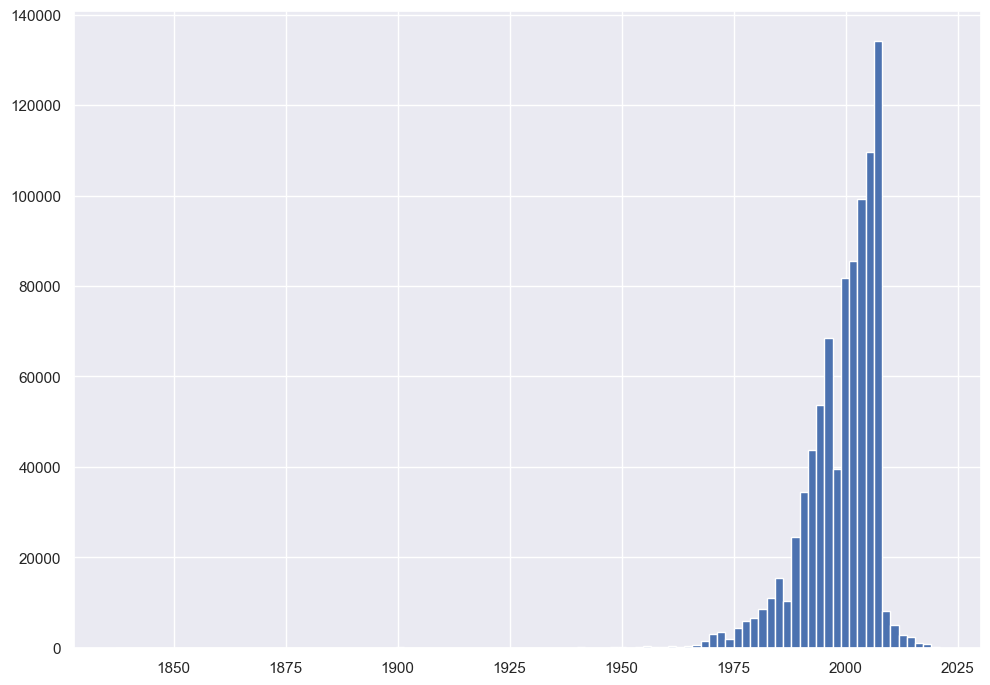

In [30]:
df.PublishYear.hist(bins=100)

- Convert year to datetime format

In [31]:
df['PublishYear'] = pd.to_datetime(df['PublishYear'], format='%Y')

## 6) Cleaning RatingDistTotal

- Remove "total:" from column and convert to int.

In [32]:
df['RatingDistTotal'] = df['RatingDistTotal'].str.replace("total:", "").astype(int)

- Drop values that don't make sense (negative)

In [33]:
df.drop(df[df['RatingDistTotal'] < 0].index, inplace=True)

## 7) Questions about the data

- Who are the top 5 most rated authors?

In [35]:
df.groupby('Authors')['RatingDistTotal'].sum().sort_values(ascending = False).head()

Authors
William Shakespeare    113107046
J.K. Rowling            77194056
Jane Austen             55316457
George Orwell           47724180
J.R.R. Tolkien          47254900
Name: RatingDistTotal, dtype: int64

- How many different publishers are there?

In [36]:
df['Publisher'].nunique()

34944

- Who are the top 5 publishers (most published books)?

They seem to be scientific and academic publishers.

In [37]:
df.pivot_table(index=['Publisher'], aggfunc ='size').sort_values(ascending=False).head()

Publisher
routledge                                                     24606
springer                                                      24335
cambridge university press                                    16322
oxford university press, usa                                  15403
peter lang gmbh, internationaler verlag der wissenschaften     8610
dtype: int64

- Which are the top 5 longest books in the dataset?

The longest books also seem to be academic / technical

In [38]:
df[['PagesNumber', 'Name']].sort_values(by=['PagesNumber'], ascending=False).head()

,PagesNumber,Name
588503,100000,scholar's library series x
123963,56086,2007 cia world factbook updated guide to the...
593693,41349,2008 cyber guide to anti-submarine warfare and...
258746,31150,air travel security and the transportation sec...
441490,29935,mars 2004 - 21st century complete guide to mar...


- What is the average/median rating of all books?

In [39]:
df['Rating'].describe()

count    870924.000000
mean          2.856395
std           1.739449
min           0.000000
25%           0.000000
50%           3.660000
75%           4.000000
max           5.000000
Name: Rating, dtype: float64

- Publisher seems to have an impact on rating.

[Text(0, 0, 'turtleback books'),
 Text(1, 0, 'thorndike press'),
 Text(2, 0, 'university of california press'),
 Text(3, 0, 'harpercollins publishers'),
 Text(4, 0, 'yale university press'),
 Text(5, 0, 'dover publications'),
 Text(6, 0, 'university of chicago press'),
 Text(7, 0, 'kessinger publishing'),
 Text(8, 0, 'princeton university press'),
 Text(9, 0, "st. martin's press"),
 Text(10, 0, 'Unknown'),
 Text(11, 0, 'oxford university press, usa'),
 Text(12, 0, 'state university of new york press'),
 Text(13, 0, 'prentice hall'),
 Text(14, 0, 'cambridge university press'),
 Text(15, 0, 'rowman & littlefield publishers'),
 Text(16, 0, 'john wiley & sons'),
 Text(17, 0, 'mcgraw-hill companies'),
 Text(18, 0, 'wiley-blackwell'),
 Text(19, 0, 'sage publications, inc'),
 Text(20, 0, 'routledge'),
 Text(21, 0, 'wiley'),
 Text(22, 0, 'palgrave macmillan'),
 Text(23, 0, 'iuniverse'),
 Text(24, 0, 'praeger'),
 Text(25, 0, 'authorhouse'),
 Text(26, 0, 'crc press'),
 Text(27, 0, 'university pr

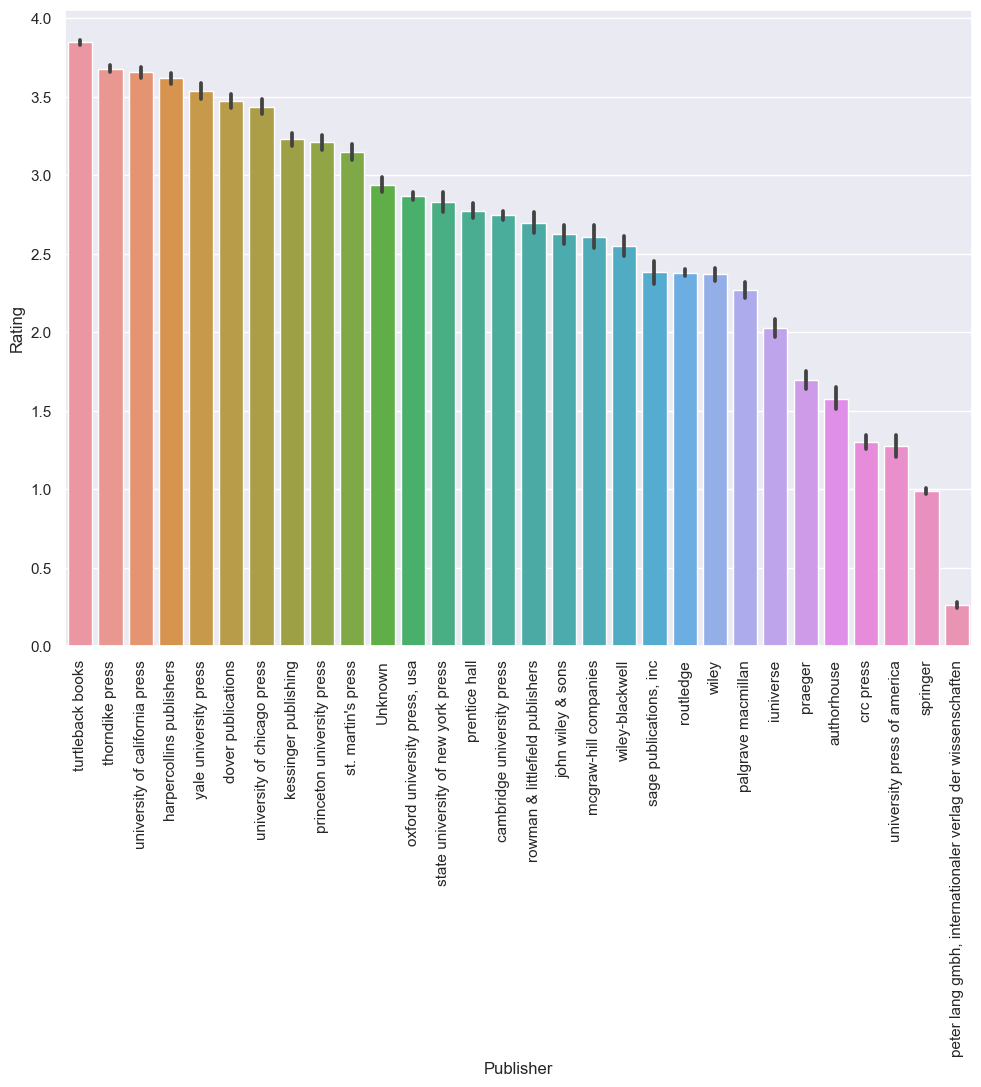

In [40]:
top_publishers = df.pivot_table(index=['Publisher'], aggfunc ='size').sort_values(ascending=False).head(30)
books_from_top_publishers = df[df['Publisher'].isin(top_publishers.index)]
publishers_in_desc_order = books_from_top_publishers.groupby('Publisher').Rating.mean().sort_values(ascending=False).index

g = sns.barplot(data=books_from_top_publishers, 
                x='Publisher', 
                y='Rating',  
                order=publishers_in_desc_order)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

- The publisher also seems to have an impact on the popularity of the books they launch.

[Text(0, 0, 'turtleback books'),
 Text(1, 0, 'thorndike press'),
 Text(2, 0, 'Unknown'),
 Text(3, 0, 'harpercollins publishers'),
 Text(4, 0, 'kessinger publishing'),
 Text(5, 0, 'dover publications'),
 Text(6, 0, "st. martin's press"),
 Text(7, 0, 'cambridge university press'),
 Text(8, 0, 'university press of america'),
 Text(9, 0, 'oxford university press, usa'),
 Text(10, 0, 'yale university press'),
 Text(11, 0, 'authorhouse'),
 Text(12, 0, 'university of california press'),
 Text(13, 0, 'palgrave macmillan'),
 Text(14, 0, 'iuniverse'),
 Text(15, 0, 'prentice hall'),
 Text(16, 0, 'university of chicago press'),
 Text(17, 0, 'princeton university press'),
 Text(18, 0, 'mcgraw-hill companies'),
 Text(19, 0, 'rowman & littlefield publishers'),
 Text(20, 0, 'routledge'),
 Text(21, 0, 'john wiley & sons'),
 Text(22, 0, 'state university of new york press'),
 Text(23, 0, 'wiley'),
 Text(24, 0, 'wiley-blackwell'),
 Text(25, 0, 'praeger'),
 Text(26, 0, 'springer'),
 Text(27, 0, 'peter lan

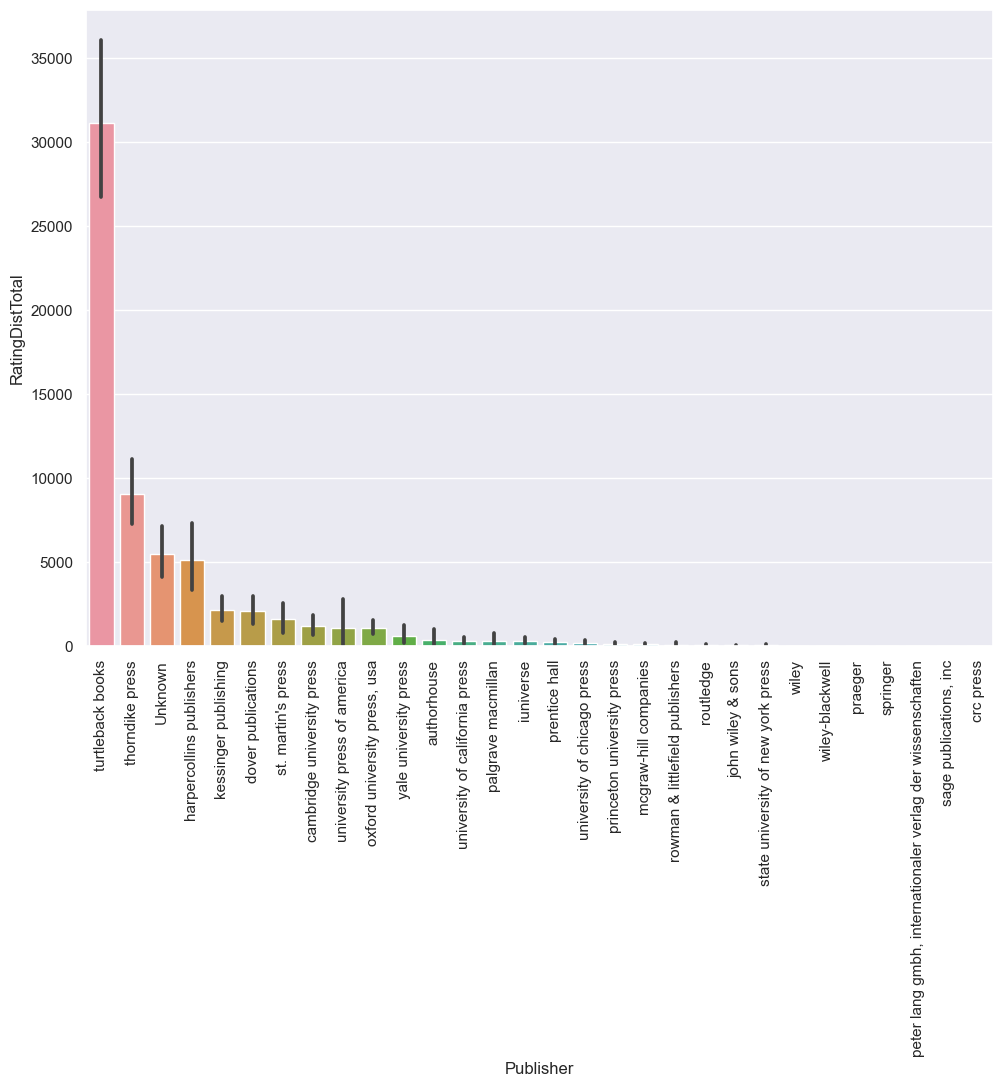

In [41]:
publishers_in_desc_order = books_from_top_publishers.groupby('Publisher').RatingDistTotal.mean().sort_values(ascending=False).index

g = sns.barplot(data=books_from_top_publishers, 
                x='Publisher', 
                y='RatingDistTotal',
                order=publishers_in_desc_order)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

Turtleback Books is a publisher of popular titles and school books for students, it makes sense that they are an outlier.

In [42]:
books_from_top_publishers[books_from_top_publishers['Publisher'] == 'turtleback books'].sort_values('RatingDistTotal', ascending=False)

,Id,Name,Authors,Rating,PublishYear,Publisher,RatingDist5,RatingDist4,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,PagesNumber,Description,Count of text reviews
437295,2888212,"twilight (twilight, #1)",Stephenie Meyer,3.60,2006-01-01,turtleback books,5:1732438,4:1102499,3:999683,2:537956,1:545250,4917826,14,eng,498,"isabella swan's move to forks, a perpetually r...",NaN
300016,2399903,diario de ana frank (anne frank: the diary of ...,Frank a,4.15,2015-01-01,turtleback books,5:1241767,4:847606,3:433318,2:111358,1:62586,2696635,0,eng,472,for use in schools and libraries only. the hea...,NaN
228143,2160454,harry potter and the goblet of fire (harry pot...,J.K. Rowling,4.56,2002-01-01,turtleback books,5:1695856,4:630013,3:184331,2:25411,1:10329,2545940,12,eng,752,harry potter is midway through his training as...,NaN
300557,2401788,the kite runner,Khaled Hosseini,4.30,2013-01-01,turtleback books,5:1246535,4:773042,3:265983,2:69505,1:39652,2394717,3,eng,400,for use in schools and libraries only. traces ...,NaN
560171,3130770,romeo and juliet (shakespeare made easy),William Shakespeare,3.75,1985-01-01,turtleback books,5:612389,4:631882,3:543164,2:183690,1:72196,2043321,0,eng,282,presents the original text of shakespeare's pl...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762175,4385327,623 adivinanzas populares y un pilon,Margarita Robleda Moguel,0.00,1988-01-01,turtleback books,5:0,4:0,3:0,2:0,1:0,0,0,eng,76,"popular, funny riddles and word games. in span...",NaN
341631,2540894,al sharpton,H. Marcovitz,0.00,2001-01-01,turtleback books,5:0,4:0,3:0,2:0,1:0,0,1,eng,112,- critically acclaimed biographies of history'...,NaN
337839,2527553,gate of dreams,Lillian Somersaulter Moats,0.00,1996-01-01,turtleback books,5:0,4:0,3:0,2:0,1:0,0,0,eng,96,the gate of dreams is reminiscent of classic f...,NaN
150041,1241193,what if dad gets lost at the zoo,Ginette Lamont Clarke,0.00,1991-01-01,turtleback books,5:0,4:0,3:0,2:0,1:0,0,0,eng,24,it's a great romp back and forth as each child...,0.0


- Does the number of pages impact the amount of reviews?

- Does the number of reviews impact the rating?

[(0.0, 500000.0)]

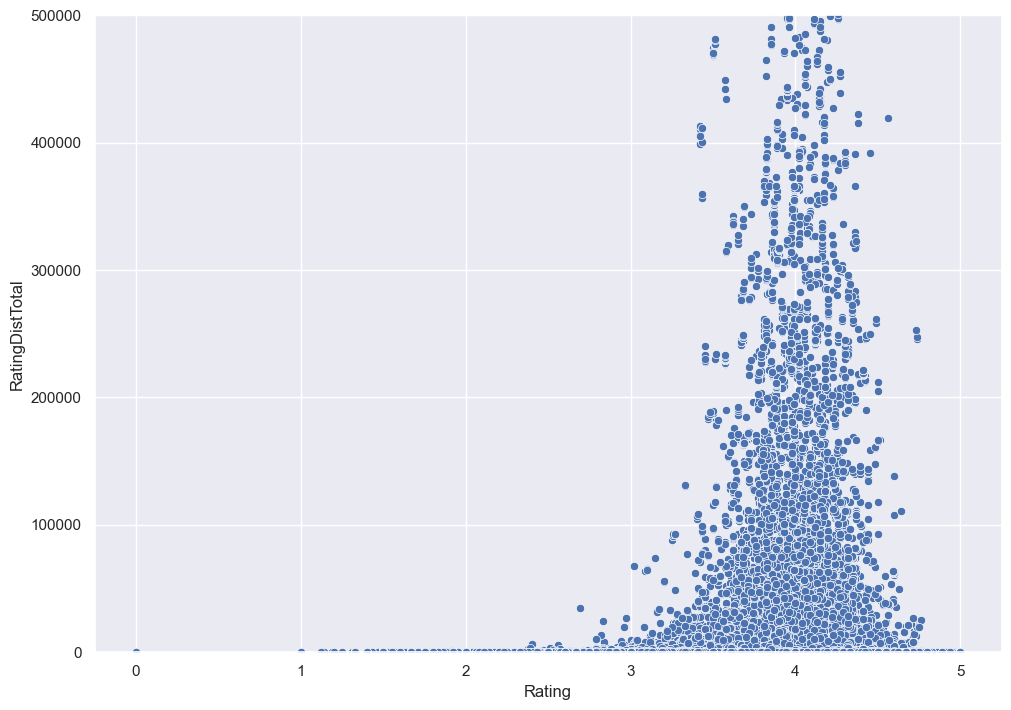

In [43]:
g = sns.scatterplot(data=df,
                x='Rating',
                y='RatingDistTotal')
g.set(ylim=(0, 500000))

- Is there a relationship between time since publication and amount of reviews?

In [44]:
df.PublishYear.dt.year

0         2007
1         2007
2         2006
3         2003
4         2007
          ... 
870920    2003
870921    1996
870922    1989
870923    1998
870924    2000
Name: PublishYear, Length: 870924, dtype: int64

/var/folders/1h/gxksx08n6xgb0ntrfqt6hl6w0000gn/T/ipykernel_4135/3509154335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_years_df['year_int'] = last_years_df['PublishYear'].dt.year


[Text(0, 0, '1950'),
 Text(1, 0, '1951'),
 Text(2, 0, '1952'),
 Text(3, 0, '1953'),
 Text(4, 0, '1954'),
 Text(5, 0, '1955'),
 Text(6, 0, '1956'),
 Text(7, 0, '1957'),
 Text(8, 0, '1958'),
 Text(9, 0, '1959'),
 Text(10, 0, '1960'),
 Text(11, 0, '1961'),
 Text(12, 0, '1962'),
 Text(13, 0, '1963'),
 Text(14, 0, '1964'),
 Text(15, 0, '1965'),
 Text(16, 0, '1966'),
 Text(17, 0, '1967'),
 Text(18, 0, '1968'),
 Text(19, 0, '1969'),
 Text(20, 0, '1970'),
 Text(21, 0, '1971'),
 Text(22, 0, '1972'),
 Text(23, 0, '1973'),
 Text(24, 0, '1974'),
 Text(25, 0, '1975'),
 Text(26, 0, '1976'),
 Text(27, 0, '1977'),
 Text(28, 0, '1978'),
 Text(29, 0, '1979'),
 Text(30, 0, '1980'),
 Text(31, 0, '1981'),
 Text(32, 0, '1982'),
 Text(33, 0, '1983'),
 Text(34, 0, '1984'),
 Text(35, 0, '1985'),
 Text(36, 0, '1986'),
 Text(37, 0, '1987'),
 Text(38, 0, '1988'),
 Text(39, 0, '1989'),
 Text(40, 0, '1990'),
 Text(41, 0, '1991'),
 Text(42, 0, '1992'),
 Text(43, 0, '1993'),
 Text(44, 0, '1994'),
 Text(45, 0, '1995')

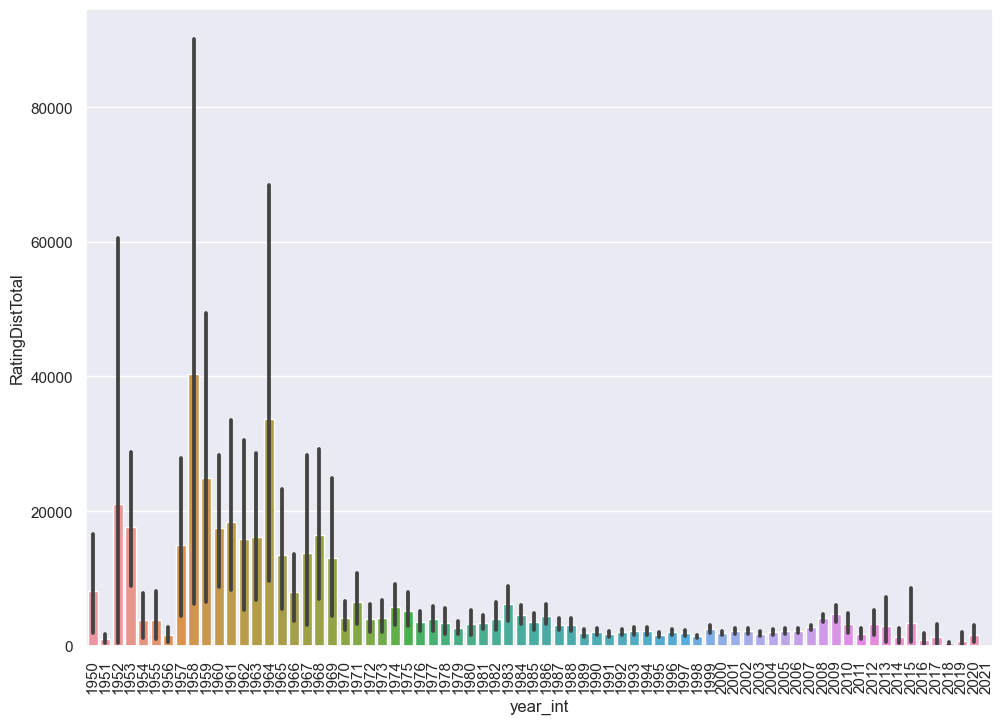

In [45]:
last_years_df = df[df['PublishYear'].dt.year >= 1950]
last_years_df['year_int'] = last_years_df['PublishYear'].dt.year
g = sns.barplot(data=last_years_df,
                x='year_int',
                y='RatingDistTotal')
g.set_xticklabels(g.get_xticklabels(), rotation=90)

- Looking at a sample, the most popular books of the latest years are top sellers (as expected) and books from movies from that same time.

In [46]:
last_years_df[last_years_df['PublishYear'].dt.year == 2003].sort_values('RatingDistTotal', ascending=False).head(100)

,Id,Name,Authors,Rating,PublishYear,Publisher,RatingDist5,RatingDist4,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,PagesNumber,Description,Count of text reviews,year_int
115668,1333677,harry potter and the chamber of secrets (harry...,J.K. Rowling,4.43,2003-01-01,large print press,5:1548690,4:723334,3:294056,2:50165,1:12373,2628618,5,eng,464,ever since harry potter had come home for the ...,5.0,2003
59438,793306,harry potter and the goblet of fire (harry pot...,J.K. Rowling,4.56,2003-01-01,arthur a. levine books,5:1651718,4:617140,3:180822,2:24691,1:9720,2484091,31,eng,752,<br /><br />,31.0,2003
481249,1801468,harry potter and the order of the phoenix (har...,J.K. Rowling,4.50,2003-01-01,bloomsbury,5:1547724,4:621636,3:217005,2:37994,1:13168,2437527,10,eng,768,there is a door at the end of a silent corrido...,NaN,2003
59477,793401,harry potter and the order of the phoenix,J.K. Rowling,4.50,2003-01-01,bloomsbury publishing plc,5:1526909,4:614586,3:214748,2:37541,1:12817,2406601,46,eng,24,dumbledore lowered his hands and surveyed harr...,46.0,2003
264668,2280415,the lovely bones,Alice Sebold,3.81,2003-01-01,chivers large print,5:607031,4:700589,3:468764,2:148455,1:70862,1995701,0,eng,376,"""my name was salmon, like the fish; first name...",NaN,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168142,821733,nickel and dimed,Barbara Ehrenreich,3.63,2003-01-01,wheeler publishing,5:44032,4:60406,3:44140,2:15610,1:11164,175352,1,eng,311,essayist and cultural critic barbara ehrenreic...,1.0,2003
31702,1684562,the wind in the willows: in two volumes,Kenneth Grahame,3.99,2003-01-01,candlewick,5:64670,4:58646,3:37768,2:9032,1:3579,173695,0,eng,192,"<b>in a beautiful single volume, inga moore’s ...",0.0,2003
669383,3603159,朗読者,Bernhard Schlink,3.76,2003-01-01,shinchosha/tsai fong books,5:40677,4:67244,3:46344,2:12493,1:3428,170186,1,eng,258,japanese edition of der vorlester or the reade...,NaN,2003
167908,820919,this lullaby,Sarah Dessen,4.03,2003-01-01,hodder children's books,5:67047,4:54103,3:35370,2:8969,1:3107,168596,26,eng,384,all rey has to remember her father by is a son...,26.0,2003


In [47]:
last_years_df[last_years_df['PublishYear'].dt.year == 2009].sort_values('RatingDistTotal', ascending=False).head(100)

,Id,Name,Authors,Rating,PublishYear,Publisher,RatingDist5,RatingDist4,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,PagesNumber,Description,Count of text reviews,year_int
75440,653187,nineteen eighty four,George Orwell,4.18,2009-01-01,heinemann library,5:1392377,4:976402,3:433970,2:116054,1:60715,2979518,7,eng,241,"one of a series of fiction titles for schools,...",NaN,2009
665451,3584379,harry potter und der orden des phönix (harry p...,J.K. Rowling,4.50,2009-01-01,carlsen verlag gmbh,5:1583784,4:634082,3:221214,2:39204,1:14185,2492469,10,eng,1020,the fifth book in the harry potter series tran...,NaN,2009
819296,4667024,the help,Kathryn Stockett,4.46,2009-01-01,amy einhorn books/g.p. putnam's sons,5:1307738,4:639237,3:177792,2:35031,1:16266,2176064,76040,eng,451,<i>librarian's note: an alternate cover editio...,NaN,2009
614127,3358608,"eclipse (twilight, #3)",Stephenie Meyer,3.69,2009-01-01,"little, brown and company",5:480332,4:369127,3:317505,2:149518,1:98689,1415171,521,eng,632,"in the dead silence, all the details suddenly ...",NaN,2009
557044,3117976,the picture of dorian gray book,Oscar Wilde,4.08,2009-01-01,pearson education,5:378475,4:347076,3:174534,2:41436,1:14187,955708,1,eng,74,classic / british english an artist paints a p...,NaN,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,1901766,we,Yevgeny Zamyatin,3.93,2009-01-01,hesperus press,5:21715,4:25532,3:15179,2:4021,1:1109,67556,13,eng,218,"<b>i, δ-503, the constructor of <i>the integra...",NaN,2009
374591,2659589,fathers and children,Ivan Turgenev,3.96,2009-01-01,w. w. norton & company,5:21672,4:26380,3:15129,2:3262,1:811,67254,28,eng,418,the novel is accompanied by a rich selection o...,NaN,2009
630520,3426918,beyond good and evil,Friedrich Nietzsche,4.00,2009-01-01,oxford university press,5:24695,4:23217,3:12442,2:3456,1:1756,65566,22,eng,240,"nietzsche's mature masterpiece, <i>beyond good...",NaN,2009
581793,3218952,sundays at tiffany's,James Patterson,3.77,2009-01-01,grand central publishing,5:20117,4:20097,3:16950,2:5931,1:2172,65267,294,eng,309,<b>the successful but lonely daughter of a pow...,NaN,2009
